In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in c:\users\anastasia\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# подключаем библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy.ma as ma
# from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from scipy import stats
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.head(20
        )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# Процентный список пропущенных данных
# for col in train.columns:
#     pct_missing = np.mean(train[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))
    

In [6]:
# impute the missing values and create the missing value indicator variables for each numeric column.
train_numeric = train.select_dtypes(include=[np.number])
numeric_cols = train_numeric.columns.values

for col in numeric_cols:
    missing = train[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        train['{}_ismissing'.format(col)] = missing
        med = train[col].median()
        train[col] = train[col].fillna(med)

imputing missing values for: LotFrontage
imputing missing values for: MasVnrArea
imputing missing values for: GarageYrBlt


In [7]:
# Процентный список пропущенных данных
# for col in train.columns:
#     pct_missing = np.mean(train[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))
    

In [8]:
# train.info()

In [9]:
train.dtypes

Id                         int64
MSSubClass                 int64
MSZoning                  object
LotFrontage              float64
LotArea                    int64
                          ...   
SaleCondition             object
SalePrice                  int64
LotFrontage_ismissing       bool
MasVnrArea_ismissing        bool
GarageYrBlt_ismissing       bool
Length: 84, dtype: object

In [10]:

cols_to_drop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
train_less = train.drop(cols_to_drop, axis=1, inplace=True)

In [11]:
# Процентный список пропущенных данных
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
    

Id - 0.0%
MSSubClass - 0.0%
MSZoning - 0.0%
LotFrontage - 0.0%
LotArea - 0.0%
Street - 0.0%
LotShape - 0.0%
LandContour - 0.0%
Utilities - 0.0%
LotConfig - 0.0%
LandSlope - 0.0%
Neighborhood - 0.0%
Condition1 - 0.0%
Condition2 - 0.0%
BldgType - 0.0%
HouseStyle - 0.0%
OverallQual - 0.0%
OverallCond - 0.0%
YearBuilt - 0.0%
YearRemodAdd - 0.0%
RoofStyle - 0.0%
RoofMatl - 0.0%
Exterior1st - 0.0%
Exterior2nd - 0.0%
MasVnrType - 1.0%
MasVnrArea - 0.0%
ExterQual - 0.0%
ExterCond - 0.0%
Foundation - 0.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinSF1 - 0.0%
BsmtFinType2 - 3.0%
BsmtFinSF2 - 0.0%
BsmtUnfSF - 0.0%
TotalBsmtSF - 0.0%
Heating - 0.0%
HeatingQC - 0.0%
CentralAir - 0.0%
Electrical - 0.0%
1stFlrSF - 0.0%
2ndFlrSF - 0.0%
LowQualFinSF - 0.0%
GrLivArea - 0.0%
BsmtFullBath - 0.0%
BsmtHalfBath - 0.0%
FullBath - 0.0%
HalfBath - 0.0%
BedroomAbvGr - 0.0%
KitchenAbvGr - 0.0%
KitchenQual - 0.0%
TotRmsAbvGrd - 0.0%
Functional - 0.0%
Fireplaces - 0.0%
GarageType

In [12]:
# фичи

In [54]:
from scipy import stats
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Квантилизация

Text(0, 0.5, 'Occurrence')

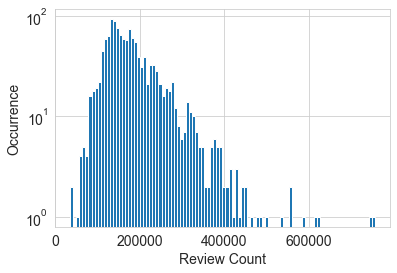

In [55]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
train['SalePrice'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [58]:
deciles = train['SalePrice'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1    113000.0
0.2    129500.0
0.3    140000.0
0.4    153500.0
0.5    168500.0
0.6    183040.0
0.7    204990.0
0.8    235000.0
0.9    283624.1
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Occurrence')

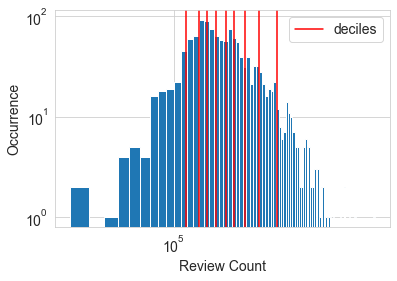

In [59]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
train['SalePrice'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [61]:
# Рангова трансформация

In [62]:
train['SalePrice'].rank().head()

0     954.0
1     800.0
2    1016.5
3     401.5
4    1119.5
Name: SalePrice, dtype: float64

In [13]:
#K-fold-Target-Encoding

In [51]:
from sklearn import base
from sklearn.model_selection import KFold

In [52]:

class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)



        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             print(tr_ind,val_ind)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            

        return X

In [53]:
targetc = KFoldTargetEncoderTrain('Feature','Target',n_fold=5)
new_train = targetc.fit_transform(train)

AssertionError: 

In [14]:

#One-hot encoding

In [15]:
train= train.dropna()

In [16]:
categorical_columns = train.columns[train.dtypes == 'object']


In [17]:
onehot_encoder = OneHotEncoder(sparse=False)

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(train[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# train_test_split

In [19]:
train.dtypes

Id                         int64
MSSubClass                 int64
MSZoning                  object
LotFrontage              float64
LotArea                    int64
                          ...   
SaleCondition             object
SalePrice                  int64
LotFrontage_ismissing       bool
MasVnrArea_ismissing        bool
GarageYrBlt_ismissing       bool
Length: 79, dtype: object

In [20]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [21]:
# print ("Train data shape:", X_train.shape)
# print ("Test data shape:", y_train.shape)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
# classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [24]:
# classifier.fit(X_train, y_train)

In [25]:
# Распределение фичей

In [26]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [27]:
# catboost

In [28]:
# from catboost import CatBoostRegressor

In [29]:
# categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [30]:

# model= CatBoostRegressor(iterations=2000,learning_rate=1,depth = 2)

In [31]:
# model.fit(X,y,categorical_features_indices)

In [32]:
# MAE metrics

In [33]:
# from sklearn.metrics import mean_absolute_error as mae

In [34]:
#  predictions = model.predict(X)
#  MAE = mae(predictions, y)

In [35]:
# print(str(MAE))
    

In [36]:
#MAE with OHE = 17771.99771484267
#MAE with TE = 

In [37]:
#Target encoding

In [38]:
# pip install target_encoding --user

In [39]:

# from target_encoding import TargetEncoderClassifier
# from target_encoding import TargetEncoder

# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score


In [40]:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# enc = TargetEncoder()
# new_X_train = enc.transform_train(X=X_train, y=y_train)
# new_X_test = enc.transform_test(X_test)

In [42]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# pred = rf.predict_proba(X_test)[:,1]
# print('without target encoding', roc_auc_score(y_test, pred))


In [43]:
# rf.fit(new_X_train, y_train)
# pred = rf.predict_proba(new_X_test)[:,1]
# print('with target encoding', roc_auc_score(y_test, pred))

In [44]:
# enc = TargetEncoderClassifier()
# enc.fit(X_train, y_train)
# pred = enc.predict_proba(X_test)[:,1]
# print('target encoding classifier', roc_auc_score(y_test, pred))